In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#-----------------------
import os
from os import listdir
from os.path import isfile,join
#-----------------------
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

## Classifier Tuning (20 points)

In [2]:
def KNNClassifier(train_data,train_label,test_data,test_label):
    neighbours = [1,3,5,7]
    accuracy_matrix = []
    for i,neighbour in zip(range(len(neighbours)),neighbours):
        print("When Neighbour = " + "[" + str(neighbour) + "]")
        clf = KNeighborsClassifier(n_neighbors = neighbour, weights = 'distance') 
        clf.fit(train_data.T, train_label) 
        output = clf.predict(test_data.T)
        accuracy_matrix.append(accuracy_score(output,test_label)) 
        print("Accuracy score is: " + str(accuracy_matrix[i]))
        count = 0
        for i in range(len(output)):
            print("[" + str(i) + "]" + "Classified as: "+ str(output[i]) +" Actual is: "+ str(test_Labelmatrix[i]))
            if((output[i]) != (test_Labelmatrix[i])):
                print("Misclassified")
                count+=1
    print("Number of Misclassified is " + str(count))
    print("=========================================")
    plt.plot(accuracy_matrix,neighbours)
    plt.show()

## Generate the Data Matrix and the Label vector (10 Points)

In [3]:
#Read the directory and return list of lists
def Read_pgm(dir_name):
    first_dir = False
    full_list = list()
    sub_directory_list = list()
    sub_files = list()
    labels = list()
    data_matrix = list()
    for x in os.walk(dir_name):
        if(first_dir == False):
            first_dir = True
            continue
        sub_directory_list.append(x[0])
    sub_directory_list.sort()
    for sub in sub_directory_list:
        sub_files.append([(sub +"/"+f) for f in listdir(sub) if isfile(join(sub, f))])
    for file in sub_files:
        for x in file:
            labels.append(x[41:43])
            full_list.append((plt.imread(x)).reshape((10304)))
    return np.asarray(full_list,dtype = "int32"),np.asarray(labels,dtype = "int32")                            
                             

In [4]:
def FTV (r,alpha,E_Values_Sorted):
    for i in range(r,10304):
        B = float(sum(E_Values_Sorted))
        T = float(sum(E_Values_Sorted[:i]))
        if(T/B >= alpha):
            return i

## Download the dataset and understand the format (10 Points)

In [5]:
full_list, labels = Read_pgm("/home/smsm/Documents/Linux-Py/att_faces")

## Split the Dataset into Training and Test sets (10 Points)

In [6]:
#Splitting Data into train and test
test_Datamatrix = []
test_Labelmatrix = []
train_Datamatrix = []
train_Labelmatrix = []

for i,index in zip(range (400),range(400)):
    if(i % 2 == 1):
        test_Datamatrix.append(full_list[index])
        test_Labelmatrix.append(labels[index])
    else:
        train_Datamatrix.append(full_list[index])
        train_Labelmatrix.append(labels[index])

In [7]:
test_Datamatrix = np.asarray(test_Datamatrix,dtype = "int32")
test_Labelmatrix = np.asarray(test_Labelmatrix,dtype = "int32")
train_Datamatrix = np.asarray(train_Datamatrix,dtype = "int32")
train_Labelmatrix = np.asarray(train_Labelmatrix,dtype = "int32")

## Classification using PCA.(30 points)

In [8]:
def PCA():
    mean = np.mean(train_Datamatrix,axis = 0)
    Z_Matrix = train_Datamatrix - mean
    Z_Matrix_Test = test_Datamatrix - np.mean(test_Datamatrix, axis = 0)
    Cov_Matrix = np.cov(Z_Matrix,rowvar = 0 , bias = 1)
    E_Values , E_Vectors = np.linalg.eigh(Cov_Matrix)
    idx = E_Values.argsort()[::-1]
    E_Values_Sorted = E_Values[idx]
    E_Vectors_Sorted = E_Vectors[:,idx]
    r_values = [0.8,0.85,0.9,0.95]
    for r in r_values:
        r_value = FTV(0,r,E_Values_Sorted)
        New_Matrix = E_Vectors_Sorted[: , 0 : r_value + 1]
        U_Train = np.dot(New_Matrix.T , Z_Matrix.T)
        U_Test = np.dot(New_Matrix.T , Z_Matrix_Test.T)
        print("For r: " + str(r))
        KNNClassifier(U_Train,train_Labelmatrix,U_Test,test_Labelmatrix)

For r: 0.8
When Neighbour = [1]
Accuracy score is: 0.96
[0]Classified as: 1 Actual is: 1
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classified as: 4 Actual is: 4
[20]Classified as: 5 Actual is: 5
[21]Classified as: 5 Actual is: 5
[22]Classified as: 40 Actual is: 5
Misclassified
[23]Classified as: 5 Actual is: 5
[24]Classified as: 5 Actual is: 5
[25]Classified as: 6 Actual is: 6
[26]Classified as: 6 Actual is: 6
[27]Classified as: 6 

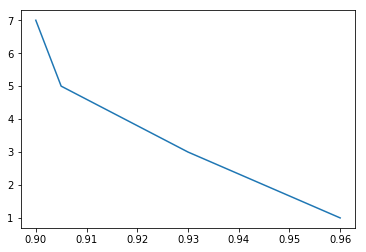

For r: 0.85
When Neighbour = [1]
Accuracy score is: 0.955
[0]Classified as: 1 Actual is: 1
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classified as: 4 Actual is: 4
[20]Classified as: 5 Actual is: 5
[21]Classified as: 5 Actual is: 5
[22]Classified as: 40 Actual is: 5
Misclassified
[23]Classified as: 5 Actual is: 5
[24]Classified as: 5 Actual is: 5
[25]Classified as: 6 Actual is: 6
[26]Classified as: 6 Actual is: 6
[27]Classified as: 

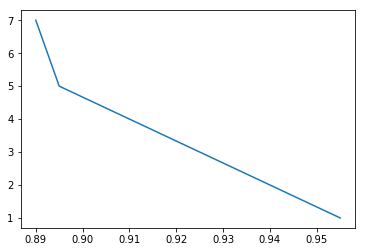

For r: 0.9
When Neighbour = [1]
Accuracy score is: 0.955
[0]Classified as: 1 Actual is: 1
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classified as: 4 Actual is: 4
[20]Classified as: 5 Actual is: 5
[21]Classified as: 5 Actual is: 5
[22]Classified as: 40 Actual is: 5
Misclassified
[23]Classified as: 5 Actual is: 5
[24]Classified as: 5 Actual is: 5
[25]Classified as: 6 Actual is: 6
[26]Classified as: 6 Actual is: 6
[27]Classified as: 6

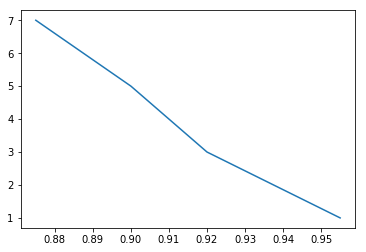

For r: 0.95
When Neighbour = [1]
Accuracy score is: 0.95
[0]Classified as: 1 Actual is: 1
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classified as: 4 Actual is: 4
[20]Classified as: 5 Actual is: 5
[21]Classified as: 5 Actual is: 5
[22]Classified as: 40 Actual is: 5
Misclassified
[23]Classified as: 5 Actual is: 5
[24]Classified as: 5 Actual is: 5
[25]Classified as: 6 Actual is: 6
[26]Classified as: 6 Actual is: 6
[27]Classified as: 6

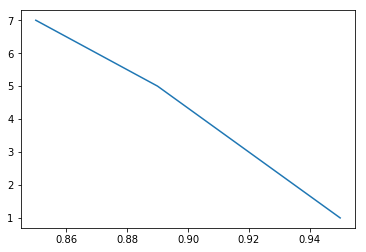

In [9]:
PCA()    

## Classification using LDA (30 points)

In [8]:
def LDA (matrix,number_of_classes):
    LDA_Matrix = []
    for i in range(40):
        LDA_Matrix.append([])
    j = -1
    for i in range(200):
        if (i % 5 == 0):
            j = j + 1
        LDA_Matrix[j].append(matrix[i])
    LDA_matrix = np.asarray(LDA_Matrix,dtype="int32")
    
    Sb = np.zeros((10304,10304), dtype = np.float32)
    Z = np.zeros((40,5,10304), dtype = np.float32)
    Si = np.zeros((10304,10304),dtype = np.float32)
    S = 0
    Mean = np.zeros((40,10304), dtype = np.float32)
    print(LDA_matrix.shape)
    Mean = (np.mean(LDA_matrix,axis = 1))
    print(Mean)
    Overall_Mean = np.mean(Mean, axis = 0)
    for i in range (number_of_classes):   
        Sb += (5 * (np.dot((Mean[i]-Overall_Mean).T,(Mean[i]-Overall_Mean))))
    for i in range (number_of_classes):
        Z[i] = (LDA_matrix[i] - Mean[i])
    print(Z.T.shape)
    for i in range (number_of_classes):
        Si += (np.dot(Z[i].T,Z[i]))
    Si = np.asarray(Si)
    Sinv = np.linalg.inv(Si)
    SinvB = np.matmul(Sinv,Sb)
    E_Values_LDA , E_Vectors_LDA = np.linalg.eig(SinvB)
    idx = E_Values_LDA.argsort()[::-1]
    E_Values_Sorted = E_Values_LDA[idx]
    E_Vectors_Sorted = E_Vectors_LDA[:,idx]
    U_Train_LDA = np.dot(train_Datamatrix , E_Vectors_LDA)
    U_Test_LDA = np.dot(test_Datamatrix , E_Vectors_LDA)
    KNNClassifier(U_Train_LDA.real.T,train_Labelmatrix,U_Test_LDA.real.T,test_Labelmatrix)

(40, 5, 10304)
[[ 51.4  55.2  54.4 ...  62.8  62.6  65.8]
 [ 36.8  35.4  35.8 ...  76.   76.4  73. ]
 [103.6 104.6 105.8 ...  46.2  47.6  47.8]
 ...
 [108.  110.2 109.  ...  71.   64.4  65.6]
 [ 85.6  88.   84.4 ... 129.6 127.2 125.4]
 [123.2 123.6 124.4 ...  68.8  68.6  67.2]]
(10304, 5, 40)
When Neighbour = [1]
Accuracy score is: 0.95
[0]Classified as: 2 Actual is: 1
Misclassified
[1]Classified as: 1 Actual is: 1
[2]Classified as: 1 Actual is: 1
[3]Classified as: 1 Actual is: 1
[4]Classified as: 1 Actual is: 1
[5]Classified as: 2 Actual is: 2
[6]Classified as: 2 Actual is: 2
[7]Classified as: 2 Actual is: 2
[8]Classified as: 2 Actual is: 2
[9]Classified as: 2 Actual is: 2
[10]Classified as: 3 Actual is: 3
[11]Classified as: 3 Actual is: 3
[12]Classified as: 3 Actual is: 3
[13]Classified as: 3 Actual is: 3
[14]Classified as: 3 Actual is: 3
[15]Classified as: 4 Actual is: 4
[16]Classified as: 4 Actual is: 4
[17]Classified as: 4 Actual is: 4
[18]Classified as: 4 Actual is: 4
[19]Classif

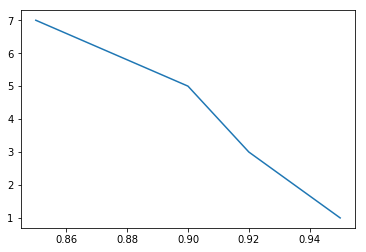

In [9]:
LDA((train_Datamatrix),40)